In [1]:

from fundus_odmac_toolkit.models.hf_hub import list_models
from fundus_data_toolkit.utils.visualization import plot_image_and_mask
from fundus_data_toolkit.functional import open_image
from fundus_odmac_toolkit.models.segmentation import segment


In [2]:
list_models()

Architecture |  Encoder |  Variants
unet seresnet50  (1 variants)
unet maxvit_tiny_tf_512  (1 variants)
unet maxvit_base_tf_512  (1 variants)
unet mobilevitv2_100  (1 variants)
unetplusplus seresnet50  (1 variants)
unet mobilenetv3_small_050  (1 variants)
unetplusplus mobilenetv3_small_050  (1 variants)
unet maxvit_small_tf_512  (1 variants)


/home/clement/miniforge-pypy3/envs/dl/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


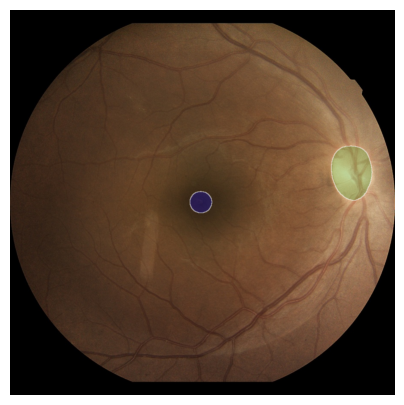

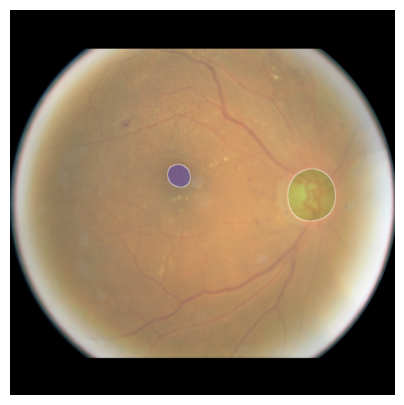

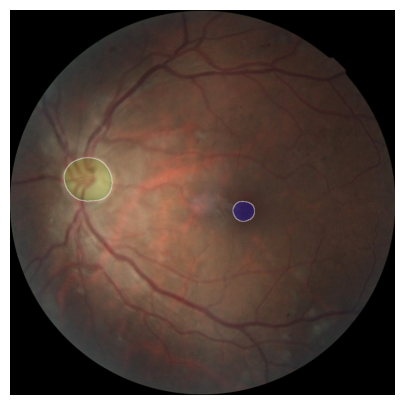

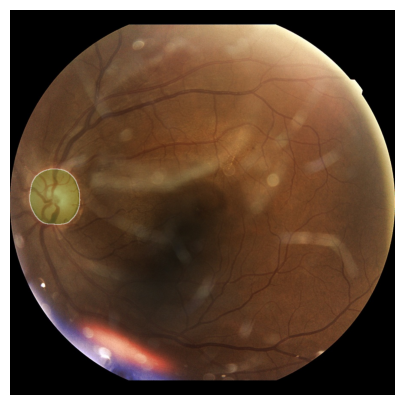

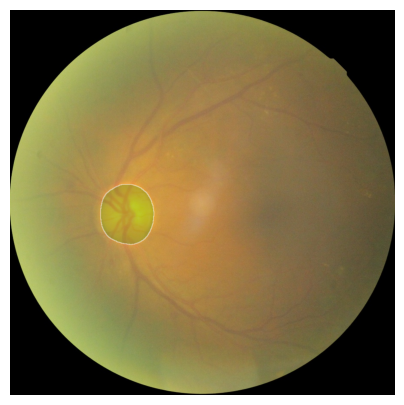

In [3]:

paths = [
         '/home/clement/Documents/data/retinal-lesions-v20191227/images_896x896/18740_right.jpg',
         '/home/clement/Documents/data/retinal-lesions-v20191227/images_896x896/20469_left.jpg',
         '/home/clement/Documents/data/retinal-lesions-v20191227/images_896x896/23668_left.jpg',
         '/home/clement/Documents/data/retinal-lesions-v20191227/images_896x896/21513_left.jpg',
         '/home/clement/Documents/data/retinal-lesions-v20191227/images_896x896/17004_left.jpg',]


for p in paths:
    image = open_image(p)
    pred = segment(image, image_resolution=512, arch='unet', encoder='maxvit_small_tf_512', use_tta=True)
    plot_image_and_mask(image, pred.argmax(0), kernel_size=3, border_alpha=0.5, alpha=0.25, 
                        figsize=(5,5),
                        colors=['black', 'green', 'blue'], num_classes=3)
